## 案例：国内旅游总花费的影响因素

<center>
    姓名：叶家辉 <br>
    学号：201800830004
</center>

### 一、提出问题

2004年中国国际旅游交易会指出，到2020年，中国旅游业总收入将超过3000亿美元，相当于国内生产总值的8%到11%。（资料来源：国际金融报2004年11月25日第二版）与之形成对比的是，同期农业占国内生产总值的比重仅为15%。毫无疑问的是，旅游业已经成为拉动国内经济增长的重要力量。

然而前进的道路并不是一帆风顺。当今世界，世纪疫情与百年变局叠加，旅游业首当其冲面临巨大压力。为了定量评估当前经济新形势对旅游业的整体影响、预测旅游业未来走向并通过调整宏观政策尽可能促进旅游业复苏，根据历史数据分析国内旅游总花费的影响因素就显得尤为重要。简单的经济学常识告诉我们，经济发展水平越高、道路基础建设越先进，越能促进旅游业花费的增加，因此很容易想到国内旅游总花费可能与国内生产总值、铁路里程、公路里程有关。

本课题旨在根据1994年～2016年的相关数据建立简单线性回归模型，分别探索中国国内旅游总花费与国内生产总值、铁路里程、公路里程的定量关系，并对所建立的回归模型进行检验，对几个模型估计检验结果进行比较。

### 二、模型设定

从经验上应该不难看出，国内生产总值、铁路里程、公路里程三者与中国国内旅游总花费应该成正相关的关系，即国内生产总值越高、铁路里程越长、公路里程越长，中国国内旅游总花费越高。如果分别看三者的单独影响的话，则可以建立三个一元的简单模型。

在之后的模型中，我们令$Y$代表中国国内旅游总花费（亿元），$X_1$代表国内生产总值（亿元），$X_2$代表铁路里程（万公里），$X_3$代表公路里程（万公里）。为了确定模型的具体形式，我们先来观察一下数据的特点。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 将数据读入为DataFrame
df = pd.read_excel('data.xlsx',header=1)
df.rename(columns = {'国内旅游总花费(亿元)':'Y','国内生产总值(亿元)':'X1','铁路里程(万公里)':'X2','公路里程(万公里)':'X3'},inplace = True)

print(df)

      年份        Y        X1     X2      X3
0   1994   1023.5   48637.5   5.90  111.78
1   1995   1375.7   61339.9   6.24  115.70
2   1996   1638.4   71813.6   6.49  118.58
3   1997   2112.7   79715.0   6.60  122.64
4   1998   2391.2   85195.5   6.64  127.85
5   1999   2831.9   90564.4   6.74  135.17
6   2000   3175.5  100280.1   6.87  167.98
7   2001   3522.4  110863.1   7.01  169.80
8   2002   3878.4  121717.4   7.19  176.52
9   2003   3442.3  137422.0   7.30  180.98
10  2004   4710.7  161840.2   7.44  187.07
11  2005   5285.9  187318.9   7.54  334.52
12  2006   6229.7  219438.5   7.71  345.70
13  2007   7770.6  270232.3   7.80  358.37
14  2008   8749.3  319515.5   7.97  373.02
15  2009  10183.7  349081.4   8.55  386.08
16  2010  12579.8  413030.3   9.12  400.82
17  2011  19305.4  489300.6   9.32  410.64
18  2012  22706.2  540367.4   9.76  423.75
19  2013  26276.1  595244.4  10.31  435.62
20  2014  30311.9  643974.0  11.18  446.39
21  2015  34195.1  689052.1  12.10  457.73
22  2016  3

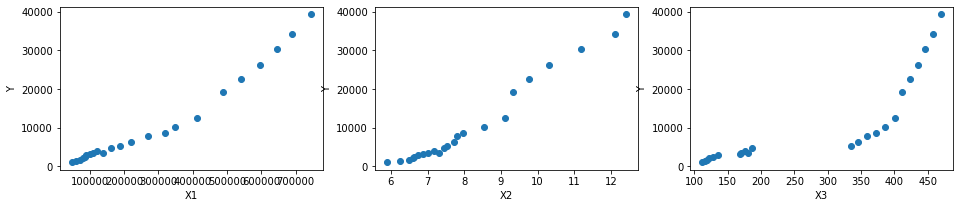

In [2]:
plt.figure(figsize = (16,3))

plt.subplot(1,3,1)
plt.scatter(df['X1'],df['Y'])
plt.xlabel("X1")
plt.ylabel("Y")

plt.subplot(1,3,2)
plt.scatter(df['X2'],df['Y'])
plt.xlabel("X2")
plt.ylabel("Y")

plt.subplot(1,3,3)
plt.scatter(df['X3'],df['Y'])
plt.xlabel("X3")
plt.ylabel("Y")

plt.show()

可以看出，在一定范围内，$X_1,X_2,X_3$与$Y$近似成线性关系，因此我们可以构建简单线性回归模型来解决这个问题。在简单线性回归中，样本回归函数是线性函数，即可表示为

$$\hat{Y_i} = \hat{\beta_1} + \hat{\beta_2}X_i$$

其中$\hat{Y_i}$是与$X_i$对应的$Y$的样本条件均值，$\hat{\beta_1}$和$\hat{\beta_2}$分别为样本回归函数的参数。如果引入被解释变量$Y$的观测值$Y_i$与样本条件均值$\hat{Y_i}$的差值$e_i$，则上式可写成$Y_i = \hat{\beta_1} + \hat{\beta_2}X_i + e_i$。

我们需要用样本回归函数去估计总体回归函数，也就是寻找一种方法，使得SRF中的$\hat{\beta_1}$和$\hat{\beta_2}$尽可能接近PRF中的$\beta_1$和$\beta_2$。对于简单线性回归，一般考虑最小二乘估计。

### 三、参数估计

估计中存在随机扰动项，只有对随机扰动的分布等做出假定，才能确定所估计参数的分布性质，也才能够使得做出的估计具有良好的统计性质。这些假定分别是零均值假定、同方差假定、无自相关性假定、随机扰动与解释变量不相关假定和正态性假定。在对模型和变量，以及随机扰动项做出假定的基础上，我们寻找一种理想的估计方法，使得$Y_i$与$\hat{Y_i}$的差值$e_i$尽可能小，即

$$min(\sum{e_i^2}) = min(\sum(Y_i - \hat{\beta_1} - \hat{\beta_2}X_i)^2)$$

具体的估计方法如下：

In [3]:
from scipy.optimize import leastsq
import numpy as np

# 定义回归函数
def fun(p,x):
    b1,b2 = p
    return b1+b2*x

# 定义误差项
def error(p,x,y):
    return fun(p,x)-y

# 设定变量观测值
Y = df['Y']
X1 = df['X1']
X2 = df['X2']
X3 = df['X3']
p0 = np.array([0,0])
# 分别估计三个模型的参数
par1 = leastsq(error,p0,args=(X1,Y))[0]
par2 = leastsq(error,p0,args=(X2,Y))[0]
par3 = leastsq(error,p0,args=(X3,Y))[0]
# 输出模型的参数（保留两位小数）
print("Y = {} + {} * X1".format(round(par1[0],2),round(par1[1],2)))
print("Y = {} + {} * X2".format(round(par2[0],2),round(par2[1],2)))
print("Y = {} + {} * X3".format(round(par3[0],2),round(par3[1],2)))

Y = -3228.02 + 0.05 * X1
Y = -39438.73 + 6165.25 * X2
Y = -9106.17 + 71.64 * X3


### 四、模型检验

为了对模型进行检验，我们需要判断解释变量是否是被解释变量的显著影响因素，即进行显著性检验。

**可决系数**：回归平方和（解释了的变差ESS）$\sum{\hat{y_i^2}}$在总变差（TSS）$\sum{y_i^2}$中所占的比重，即

$$r^2 = {{\sum{\hat{y_i^2}}}\over{\sum{y_i^2}}}$$

可决系数越大，说明在总变差中由模型做出了解释的部分占比越大，模型拟合优度越好。反之亦然。

**p值**：基于既定的样本数据计算的统计量，是拒绝原假设的最低显著性水平。具体方法为：

* ${\alpha \over 2} > {p \over 2}$，则在显著性水平$\alpha$下拒绝原假设，即认为有显著性影响

* ${\alpha \over 2} \leqslant {p \over 2}$，则在显著性水平$\alpha$下接受原假设，即认为没有显著性影响

具体操作如下：

#### 4.1 国内生产总值对国内旅游总花费的模型检验

In [4]:
import statsmodels.formula.api as smf

est1 = smf.ols(formula='Y ~ X1', data=df).fit()

# 打印系数
print(est1.params)
# 打印回归结果
print(est1.summary())

Intercept   -3228.021157
X1              0.050131
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     470.0
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           7.43e-16
Time:                        15:23:54   Log-Likelihood:                -211.26
No. Observations:                  23   AIC:                             426.5
Df Residuals:                      21   BIC:                             428.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

从中我们可以得到

$$ Y = -3228.02 + 0.05 * X_1 $$

$$SE = (834.320)\ \ (0.002)$$

$$t = (-3.869)\ \ (21.680)$$

$$r^2 = 0.957\ \ \ \ df = 21$$

可决系数$R^2=0.957$，说明模型整体上拟合良好。

在给定$\alpha=0.05$下查t分布表，在自由度为$n-2=21$时临界值为$t_{0.025}(21) = 2.0796$，而$t=21.680 > t_{0.025}(21) = 2.0796$，说明“国内生产总值”对“国内旅游总花费”有显著影响。

另一方面，$p=0.000<<\alpha=0.05$，即在显著性水平$\alpha$下拒绝原假设，即认为“国内生产总值”对“国内旅游总花费”有显著影响。

从经济意义来看，估计的解释变量$X_1$的系数为0.05，即表示国内生产总值每增加1万亿元，国内旅游总花费就会增加0.05亿元，这大致符合经济发展的一般规律。

#### 4.2 铁路里程对国内旅游总花费的模型检验

In [5]:
import statsmodels.formula.api as smf

est2 = smf.ols(formula='Y ~ X2', data=df).fit()

# 打印系数
print(est2.params)
# 打印回归结果
print(est2.summary())

Intercept   -39438.731202
X2            6165.252512
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     702.1
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           1.27e-17
Time:                        15:23:54   Log-Likelihood:                -206.81
No. Observations:                  23   AIC:                             417.6
Df Residuals:                      21   BIC:                             419.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

从中我们可以得到

$$ Y = -39438.73 + 6165.25 * X_2 $$

$$SE = (1950.462)\ \ (232.682)$$

$$t = (-20.220)\ \ (26.496)$$

$$r^2 = 0.971\ \ \ \ df = 21$$

可决系数$R^2=0.971$，说明模型整体上拟合良好。

在给定$\alpha=0.05$下查t分布表，在自由度为$n-2=21$时临界值为$t_{0.025}(21) = 2.0796$，而$t=26.496 > t_{0.025}(21) = 2.0796$，说明“铁路里程”对“国内旅游总花费”有显著影响。

另一方面，$p=0.000<<\alpha=0.05$，即在显著性水平$\alpha$下拒绝原假设，即认为“铁路里程”对“国内旅游总花费”有显著影响。

从经济意义来看，估计的解释变量$X_2$的系数为6165.25，即表示铁路里程每增加1万公里，国内旅游总花费就会增加6165.25亿元，这大致符合经济发展的一般规律。

#### 4.3 公路里程对国内旅游总花费的模型检验

In [6]:
import statsmodels.formula.api as smf

est3 = smf.ols(formula='Y ~ X3', data=df).fit()

# 打印系数
print(est3.params)
# 打印回归结果
print(est3.summary())

Intercept   -9106.166319
X3             71.639385
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     49.30
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           6.24e-07
Time:                        15:23:54   Log-Likelihood:                -233.61
No. Observations:                  23   AIC:                             471.2
Df Residuals:                      21   BIC:                             473.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

从中我们可以得到

$$ Y = -9106.17 + 71.64 * X_3 $$

$$SE = (3170.972)\ \ (10.203)$$

$$t = (-2.872)\ \ (7.021)$$

$$r^2 = 0.701\ \ \ \ df = 21$$

可决系数$R^2=0.701$，说明模型整体上拟合良好。

在给定$\alpha=0.05$下查t分布表，在自由度为$n-2=21$时临界值为$t_{0.025}(21) = 2.0796$，而$t=7.021 > t_{0.025}(21) = 2.0796$，说明“公路里程”对“国内旅游总花费”有显著影响。

另一方面，$p=0.000<<\alpha=0.05$，即在显著性水平$\alpha$下拒绝原假设，即认为“公路里程”对“国内旅游总花费”有显著影响。

从经济意义来看，估计的解释变量$X_3$的系数为71.64，即表示公路里程每增加1万公里，国内旅游总花费就会增加71.64亿元，这大致符合经济发展的一般规律。

公路里程相比于铁路里程而言，显著性相对较弱，同时解释变量估计的系数也较小，这说明铁路里程的增加对于旅游总花费的贡献更大，这也从侧面说明人们旅游时普遍更愿意乘坐铁路交通出行。

### 五、模型应用

运用计量经济模型做预测，指的是利用所估计的样本回归函数，用**解释变量的已知值或预测值**，对**预测期或样本以外**的被解释变量数值做出定量估计。

计量经济预测是一种条件预测，即要求模型设定的关系式不变、所估计的参数不变、解释变量在预测期的取值已做出预测。

被解释变量的预测又分为点预测和区间预测。以下应用三个模型分别进行预测。

#### 5.1 国内生产总值对国内旅游总花费的模型检验

##### 被解释变量平均值的点预测

根据国家统计局公布的数据，2017年、2018年、2019年、2020年中国国内生产总值分别为827122亿元、900309亿元、990865亿元、1015986亿元。

据此分别对2017年～2020年的国内旅游总花费进行点预测：

$$\hat{Y_{F_{2017}}} = −3228.02 + 0.05 \times 827122 = 38128.08$$

$$\hat{Y_{F_{2018}}} = −3228.02 + 0.05 \times 900309 = 41787.43$$

$$\hat{Y_{F_{2019}}} = −3228.02 + 0.05 \times 990865 = 46315.23$$

$$\hat{Y_{F_{2020}}} = −3228.02 + 0.05 \times 1015986 = 47571.28$$

##### 被解释变量平均值的区间预测

被解释变量$Y$平均值的置信度为$1-\alpha$的预测区间为

$$Y_F = \hat{Y_F} \mp t_{\alpha / 2} \hat{\sigma} \sqrt{{1\over n}+{{(X_F-\overline{X})^2}\over {\sum{x_i^2}}}}$$

其中$t_{\alpha / 2} = 2.0796$，$\hat{\sigma}^2 = \sum{e_i^2 \over (n-2)}$，即

In [7]:
x = np.array(df['X1'])
y = np.array(df['Y'])
beta1 = -3228.02
beta2 = 0.05
n = 21
sigma = np.sqrt(np.sum((y - ( beta1 + beta2 * x))**2 /n))

所以区间预测的上下限可以计算如下：

In [8]:
Yf = [38128.08, 41787.43, 46315.23, 47571.28]
Xf = [827122, 900309, 990865, 1015986]
t = 2.0796

low = Yf - t * sigma * np.sqrt(1/n + (Xf - np.mean(x))**2 / np.sum((x-np.mean(x))**2))
high = Yf + t * sigma * np.sqrt(1/n + (Xf - np.mean(x))**2 / np.sum((x-np.mean(x))**2))

for i in range(4):
    print("{}年如果国内生产总值为{}亿元，国内旅游总花费置信度95%的预测区间为({},{})亿元".format(2017+i,Xf[i],round(low[i],2),round(high[i],2)))

2017年如果国内生产总值为827122亿元，国内旅游总花费置信度95%的预测区间为(35285.02,40971.14)亿元
2018年如果国内生产总值为900309亿元，国内旅游总花费置信度95%的预测区间为(38617.84,44957.02)亿元
2019年如果国内生产总值为990865亿元，国内旅游总花费置信度95%的预测区间为(42734.92,49895.54)亿元
2020年如果国内生产总值为1015986亿元，国内旅游总花费置信度95%的预测区间为(43876.03,51266.53)亿元


#### 5.2 铁路里程对国内旅游总花费的模型检验

##### 被解释变量平均值的点预测

根据国家统计局公布的数据，2017年、2018年、2019年、2020年中国铁路里程分别为12.70万公里、13.10万公里、13.90万公里、14.60万公里。

据此分别对2017年～2020年的国内旅游总花费进行点预测：

$$\hat{Y_{F_{2017}}} = −39438.73 + 6165.25 \times 12.7 = 38859.945$$

$$\hat{Y_{F_{2018}}} = −39438.73 + 6165.25 \times 13.1 = 41326.045$$

$$\hat{Y_{F_{2019}}} = −39438.73 + 6165.25 \times 13.9 = 46258.245$$

$$\hat{Y_{F_{2020}}} = −39438.73 + 6165.25 \times 14.6 = 50573.92$$

##### 被解释变量平均值的区间预测

被解释变量$Y$平均值的置信度为$1-\alpha$的预测区间为

$$Y_F = \hat{Y_F} \mp t_{\alpha / 2} \hat{\sigma} \sqrt{{1\over n}+{{(X_F-\overline{X})^2}\over {\sum{x_i^2}}}}$$

其中$t_{\alpha / 2} = 2.0796$，$\hat{\sigma}^2 = \sum{e_i^2 \over (n-2)}$，即

In [9]:
x = np.array(df['X2'])
y = np.array(df['Y'])
beta1 = -39438.732
beta2 = 6165.25
n = 21
sigma = np.sqrt(np.sum((y - ( beta1 + beta2 * x))**2 /n))

所以区间预测的上下限可以计算如下：

In [10]:
Yf = [38859.945, 41326.045, 46258.245, 50573.92]
Xf = [12.7, 13.1, 13.9, 14.6]
t = 2.0796

low = Yf - t * sigma * np.sqrt(1/n + (Xf - np.mean(x))**2 / np.sum((x-np.mean(x))**2))
high = Yf + t * sigma * np.sqrt(1/n + (Xf - np.mean(x))**2 / np.sum((x-np.mean(x))**2))

for i in range(4):
    print("{}年如果中国铁路里程为{}万公里，国内旅游总花费置信度95%的预测区间为({},{})亿元".format(2017+i,Xf[i],round(low[i],2),round(high[i],2)))

2017年如果中国铁路里程为12.7万公里，国内旅游总花费置信度95%的预测区间为(36486.57,41233.32)亿元
2018年如果中国铁路里程为13.1万公里，国内旅游总花费置信度95%的预测区间为(38773.26,43878.83)亿元
2019年如果中国铁路里程为13.9万公里，国内旅游总花费置信度95%的预测区间为(43341.21,49175.28)亿元
2020年如果中国铁路里程为14.6万公里，国内旅游总花费置信度95%的预测区间为(47333.81,53814.03)亿元


#### 5.3 公路里程对国内旅游总花费的模型检验

##### 被解释变量平均值的点预测

根据国家统计局公布的数据，2017年、2018年、2019年、2020年中国公路里程分别为477万公里、484.65万公里、501.25万公里、519.81万公里。

据此分别对2017年～2020年的国内旅游总花费进行点预测：

$$\hat{Y_{F_{2017}}} = -9106.17 + 71.64 \times 477 = 25066.11$$

$$\hat{Y_{F_{2018}}} = -9106.17 + 71.64 \times 484.65 = 25614.156$$

$$\hat{Y_{F_{2019}}} = -9106.17 + 71.64 \times 501.25 = 26803.38$$

$$\hat{Y_{F_{2020}}} = -9106.17 + 71.64 \times 519.81 = 28133.0184$$

##### 被解释变量平均值的区间预测

被解释变量$Y$平均值的置信度为$1-\alpha$的预测区间为

$$Y_F = \hat{Y_F} \mp t_{\alpha / 2} \hat{\sigma} \sqrt{{1\over n}+{{(X_F-\overline{X})^2}\over {\sum{x_i^2}}}}$$

其中$t_{\alpha / 2} = 2.0796$，$\hat{\sigma}^2 = \sum{e_i^2 \over (n-2)}$，即

In [11]:
x = np.array(df['X3'])
y = np.array(df['Y'])
beta1 = -9106.17
beta2 = 71.64
n = 21
sigma = np.sqrt(np.sum((y - ( beta1 + beta2 * x))**2 /n))

所以区间预测的上下限可以计算如下：

In [12]:
Yf = [25066.11, 25614.156, 26803.38, 28133.0184]
Xf = [477, 484.65, 501.25, 519.81]
t = 2.0796

low = Yf - t * sigma * np.sqrt(1/n + (Xf - np.mean(x))**2 / np.sum((x-np.mean(x))**2))
high = Yf + t * sigma * np.sqrt(1/n + (Xf - np.mean(x))**2 / np.sum((x-np.mean(x))**2))

for i in range(4):
    print("{}年如果中国公路里程为{}万公里，国内旅游总花费置信度95%的预测区间为({},{})亿元".format(2017+i,Xf[i],round(low[i],2),round(high[i],2)))

2017年如果中国公路里程为477万公里，国内旅游总花费置信度95%的预测区间为(19955.45,30176.77)亿元
2018年如果中国公路里程为484.65万公里，国内旅游总花费置信度95%的预测区间为(20370.37,30857.94)亿元
2019年如果中国公路里程为501.25万公里，国内旅游总花费置信度95%的预测区间为(21265.37,32341.39)亿元
2020年如果中国公路里程为519.81万公里，国内旅游总花费置信度95%的预测区间为(22258.47,34007.57)亿元
